### Visualizing xarray


Lets read the data


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import leafmap

In [132]:
ds = xr.open_dataset("air.mon.mean.nc")
ta = ds["air"]

### One dimensional plot


We can simply use the `plot()` method to plot the data.


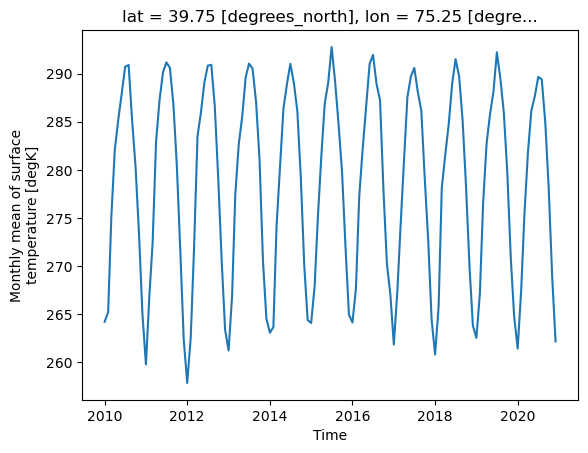

In [3]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot()

xarray under the hood used the `matplotlib` library. Any argument that goes into matplotlib can be passed to xarray


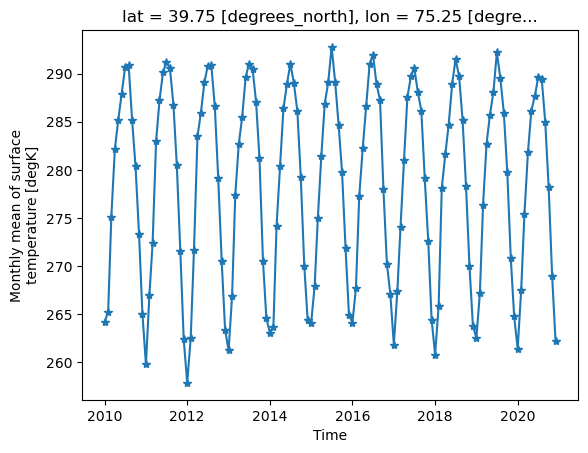

In [4]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot.line("-*")

### Controls on the figure


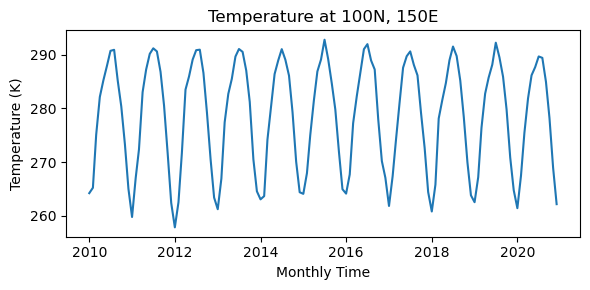

In [157]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot(
    aspect=2, size=3
)
plt.title("Temperature at 100N, 150E")
plt.xlabel("Monthly Time")
plt.ylabel("Temperature (K)")
plt.tight_layout()

Overlaying Plots¶


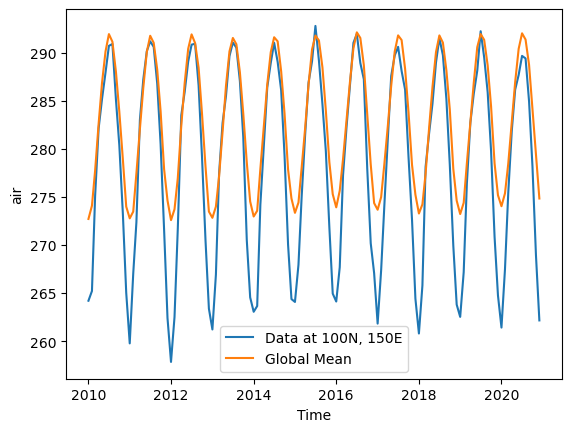

In [6]:
data1 = ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150)
data2 = ta.sel(time=slice("2010-01-01", "2020-12-31")).mean(["lat", "lon"])
fig, ax = plt.subplots()

# Plot data1 on the axes
data1.plot(ax=ax, label="data1")

# Overlay data2 on the same axes
data2.plot(ax=ax, label="data2")

plt.legend(["Data at 100N, 150E", "Global Mean"])

### Two dimensional plots


Text(0, 0.5, 'Latitude')

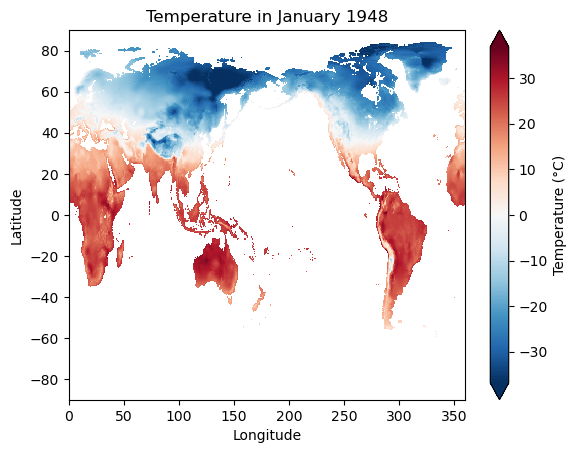

In [7]:
(ta.isel(time=0) - 273.15).plot(robust=True, cbar_kwargs={"label": "Temperature (°C)"})
plt.title("Temperature in January 1948")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Faceting

Its handy when we want to plot multiple plots along a dimension (e.g. time)


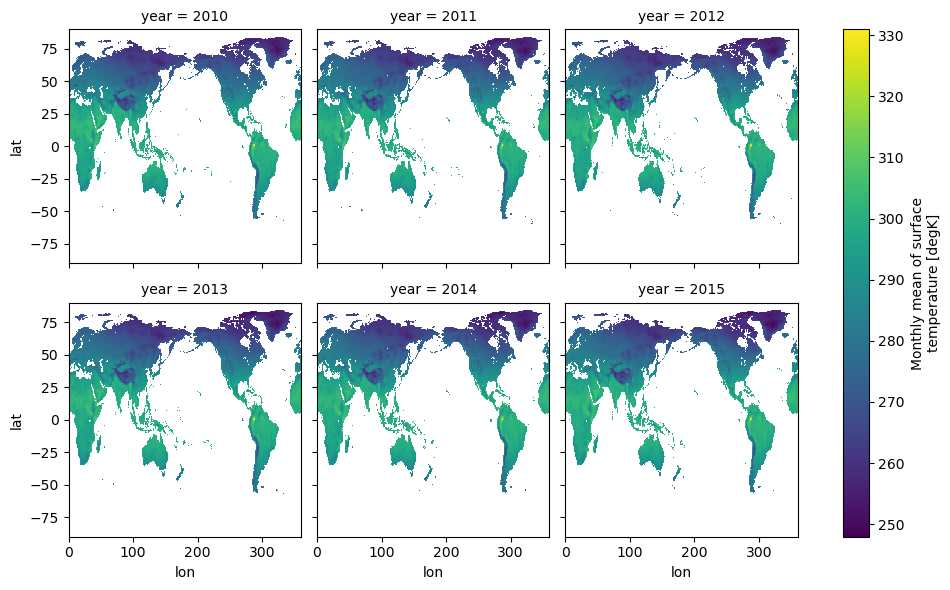

In [8]:
ta_sub = ta.sel(time=slice("2010-01-01", "2015-12-31"))
ta_sub_mean = ta_sub.groupby("time.year").mean("time")
ta_sub_mean.plot(col="year", col_wrap=3)

Adding base map


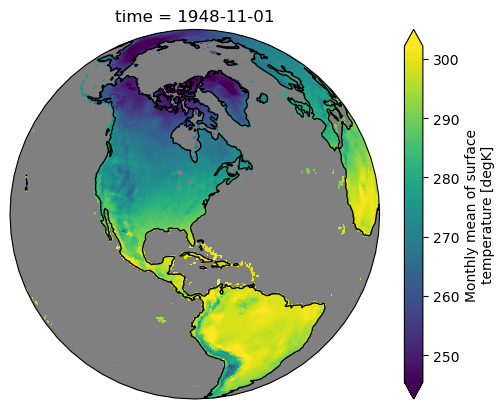

In [15]:
import cartopy.crs as ccrs

p = ta.isel(time=10).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
    robust=True,
)


p.axes.set_global()

p.axes.coastlines()

In [77]:
import hvplot.xarray
import cartopy.crs as ccrs

ta.isel(time=10).hvplot(
    robust=True,
    width=800,
    height=400,
    cmap="fire",
    # projection=ccrs.Orthographic(-90, 30),
    coastline=True,
)

:Overlay
   .Image.I     :Image   [lon,lat]   (air)
   .Coastline.I :Feature   [Longitude,Latitude]

In [140]:
ta_annual = ta.groupby("time.year").mean()
ta_annual_anomalies = ta_annual - ta_annual.mean(dim="year")

In [156]:
import hvplot.xarray
import cartopy.crs as ccrs

ta_annual = ta.resample(time="Y").mean()
ta_annual_anomalies = ta_annual - ta_annual.mean(dim="time")

ta_annual.hvplot(
    robust=True,
    width=800,
    height=400,
    cmap="fire",
    # projection=ccrs.Orthographic(-90, 30),
    coastline=True,
    groupby="time",
    widget_type="scrubber",
    widget_location="bottom",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'259b74a0-5363-488f-b823-f247af92952c': {'version…